# TFがGPUを認識しているか確認

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15006489903389120182
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4146659328
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7103368190962291382
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

# Datasetの確認

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [5]:
ds,info = tfds.load('cifar10', 
                    split=['train','test'], 
                    shuffle_files=True,
                    as_supervised=True,
                    with_info=True)

In [6]:
print(f'ds = {ds}')
print(f'info = {info}')

ds = [<PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, <PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]
info = tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='~/tensorflow_datasets/cifar10/3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'l

In [7]:
train_ds = ds[0]
test_ds = ds[1]

,image,label
0,,7 (horse)
1,,8 (ship)
2,,4 (deer)
3,,4 (deer)

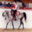
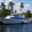
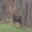
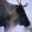

In [8]:
tfds.as_dataframe(train_ds.take(4),info)

# データセットの前処理

[参考](https://www.tensorflow.org/datasets/keras_example)

In [9]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255.0, label

In [11]:
train_ds = train_ds.map(normalize_img, num_parallel_calls = tf.data.AUTOTUNE)
train_ds = train_ds.cache()
train_ds = train_ds.shuffle(info.splits['train'].num_examples)
train_ds = train_ds.batch(64)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

In [12]:
test_ds = test_ds.map(normalize_img, num_parallel_calls = tf.data.AUTOTUNE)
test_ds = test_ds.batch(64)
test_ds = test_ds.cache()
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# モデルの構築と学習

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [18]:
model.fit(
    train_ds,
    epochs = 100,
    validation_data=test_ds
)

Epoch 1/100
782/782 [==============================] - 7s 4ms/step - loss: 1.8889 - sparse_categorical_accuracy: 0.3230 - val_loss: 1.7799 - val_sparse_categorical_accuracy: 0.3680
Epoch 2/100
782/782 [==============================] - 3s 4ms/step - loss: 1.7306 - sparse_categorical_accuracy: 0.3857 - val_loss: 1.6562 - val_sparse_categorical_accuracy: 0.4150
Epoch 3/100
782/782 [==============================] - 3s 4ms/step - loss: 1.6609 - sparse_categorical_accuracy: 0.4079 - val_loss: 1.6317 - val_sparse_categorical_accuracy: 0.4189
Epoch 4/100
782/782 [==============================] - 3s 4ms/step - loss: 1.6295 - sparse_categorical_accuracy: 0.4224 - val_loss: 1.6265 - val_sparse_categorical_accuracy: 0.4208
Epoch 5/100
782/782 [==============================] - 3s 4ms/step - loss: 1.6061 - sparse_categorical_accuracy: 0.4276 - val_loss: 1.6172 - val_sparse_categorical_accuracy: 0.4288
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 1.5873 - sparse_cate

782/782 [==============================] - 3s 4ms/step - loss: 1.3866 - sparse_categorical_accuracy: 0.5046 - val_loss: 1.5391 - val_sparse_categorical_accuracy: 0.4576
Epoch 47/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3844 - sparse_categorical_accuracy: 0.5051 - val_loss: 1.5135 - val_sparse_categorical_accuracy: 0.4717
Epoch 48/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3791 - sparse_categorical_accuracy: 0.5086 - val_loss: 1.5071 - val_sparse_categorical_accuracy: 0.4693
Epoch 49/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3763 - sparse_categorical_accuracy: 0.5095 - val_loss: 1.5274 - val_sparse_categorical_accuracy: 0.4651
Epoch 50/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3766 - sparse_categorical_accuracy: 0.5104 - val_loss: 1.5241 - val_sparse_categorical_accuracy: 0.4676
Epoch 51/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3732 - sparse_categorical

782/782 [==============================] - 3s 4ms/step - loss: 1.3214 - sparse_categorical_accuracy: 0.5253 - val_loss: 1.5870 - val_sparse_categorical_accuracy: 0.4524
Epoch 92/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3162 - sparse_categorical_accuracy: 0.5284 - val_loss: 1.5343 - val_sparse_categorical_accuracy: 0.4658
Epoch 93/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3148 - sparse_categorical_accuracy: 0.5318 - val_loss: 1.6335 - val_sparse_categorical_accuracy: 0.4352
Epoch 94/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3190 - sparse_categorical_accuracy: 0.5286 - val_loss: 1.5191 - val_sparse_categorical_accuracy: 0.4720
Epoch 95/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3100 - sparse_categorical_accuracy: 0.5333 - val_loss: 1.5421 - val_sparse_categorical_accuracy: 0.4637
Epoch 96/100
782/782 [==============================] - 3s 4ms/step - loss: 1.3098 - sparse_categorical